# Railroad Accident/Incident Analysis in US



#### Data Source:
Rail Equipment Accident/Incident Data from FRA in the US Department of Transportation <br/>
https://data.transportation.gov/Railroads/Rail-Equipment-Accident-Incident-Data/85tf-25kj

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Investigation
Scope of data:<br/>
1. Year recorded<br/>
2. what type of trains considered<br/>
3. what type of accident recorded<br/>

In [18]:
data = pd.read_csv("../../Test Data/Rail_Equipment_Accident_Incident_Data.csv")
print(f"There are {data.shape[0]} records availabe and {data.shape[1]} information recorded")
print("-------------------------------------------------------")
# available information is listed and explained in the above link
year_since = data["Report Year"].min()
year_to = data["Report Year"].max()
print(f"The datasets record year from {year_since} to {year_to}")
print("-------------------------------------------------------")
print(data["Accident Type"].unique())
print("-------------------------------------------------------")
print(data["Equipment Type"].unique())
print("-------------------------------------------------------")
print(data["Track Type"].unique())

There are 214157 records availabe and 159 information recorded
-------------------------------------------------------
The datasets record year from 1975.0 to 2022.0
-------------------------------------------------------
['Fire/violent rupture' 'Other impacts' 'Side collision' 'Derailment'
 'Broken train collision' 'Hwy-rail crossing'
 'Other (describe in narrative)' 'Rear end collision' 'Obstruction'
 'Head on collision' 'Explosion-detonation' 'Raking collision'
 'RR grade crossing' nan]
-------------------------------------------------------
['Passenger Train - Pulling' 'Single Car' 'Freight Train' 'Yard/switching'
 'Light loco(s)' 'Cut of cars' nan 'Passenger Train - Pushing'
 'Maint./inspect Car' 'EMU' 'Work train' 'Spec. MoW Equip.'
 'Commuter Train - Pulling' 'Commuter Train - Pushing' 'DMU']
-------------------------------------------------------
['Main' 'Yard' 'Industry' nan 'Siding']


## 2. Train Accident Overview
Question to be addressed:<br/>
Whether there is any improvement on reducing train accidents no during recent years?

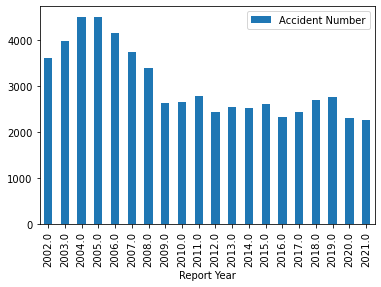

In [25]:
overview_df = data.loc[(data["Report Year"] >= 2002.0) & (data["Report Year"]<=2021.0)]
group_year = overview_df.groupby("Report Year")
group_year[["Accident Number"]].count().plot(kind="bar")
plt.show()
# xlabel delet zero

## 3. Train Accident by Cause
Question to be addressed:<br/>
What is the major train causes during recent years?

## 4. Train Accident by Type
Question to be addressed:<br/>
What is the primary accident types during recent years?

## 5. Train Accident in States
Question to be addressed:<br/>
Which state has the most accident happended in recent years?

### 5.1 Fatality by state

#### Period" for last 11 years: 2010 - 2020

In [9]:
data_fatality = data[["State Name","Report Year","Total Persons Killed"]]
data_fatality = data_fatality.loc[(data_fatality["Report Year"] >= 2010.0) & (data_fatality["Report Year"]<=2020.0) ]
data_fatality.head()

,State Name,Report Year,Total Persons Killed
0,ALASKA,2011.0,0.0
1,ALABAMA,2010.0,0.0
5,ALABAMA,2010.0,0.0
6,ALABAMA,2010.0,0.0
8,ALABAMA,2013.0,0.0


In [14]:
state_group = data_fatality.groupby("State Name")
state_group["Total Persons Killed"].sum()

State Name
ALABAMA                 18.0
ALASKA                   0.0
ARIZONA                  8.0
ARKANSAS                11.0
CALIFORNIA              82.0
COLORADO                17.0
CONNECTICUT              0.0
DELAWARE                 0.0
DISTRICT OF COLUMBIA     0.0
FLORIDA                 70.0
GEORGIA                 12.0
IDAHO                    5.0
ILLINOIS                50.0
INDIANA                 21.0
IOWA                     8.0
KANSAS                   9.0
KENTUCKY                 5.0
LOUISIANA               21.0
MAINE                    2.0
MARYLAND                 7.0
MASSACHUSETTS            5.0
MICHIGAN                 8.0
MINNESOTA               12.0
MISSISSIPPI             24.0
MISSOURI                10.0
MONTANA                  9.0
NEBRASKA                 5.0
NEVADA                  12.0
NEW HAMPSHIRE            0.0
NEW JERSEY               7.0
NEW MEXICO               7.0
NEW YORK                23.0
NORTH CAROLINA          13.0
NORTH DAKOTA             8.0
OHI

## 6. Train Accident Associated Factors
Question to be addressed:<br/>
1. Whether there is relationship between train speed and people injured
2. Whether there is relationship between equipment weight and people injured